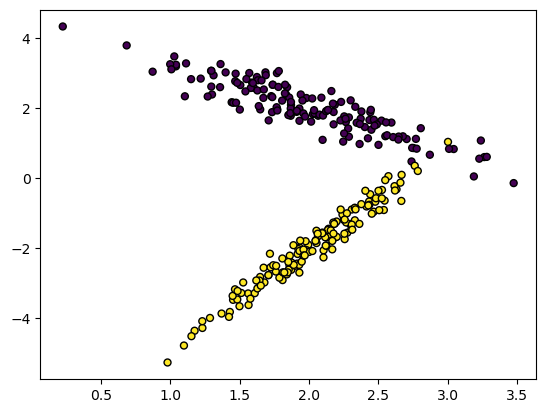

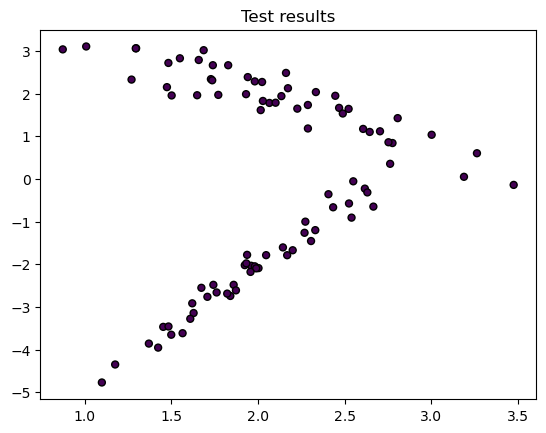

Accuracy: 0.5


In [1]:
##### Artificial Immune System - Negative Selection Algorithm (NSA) #####

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
 
# Step 1: Generate synthetic data 
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
n_redundant=0, n_clusters_per_class=1, weights=[0.5], flip_y=0, class_sep=2) 
# Visualizing the data 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k') 
plt.show() 
 
# Splitting data into train (self) and test (new samples, possibly non-self) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
 
 
# Step 2: NSA Implementation 
class NegativeSelectionClassifier: 
    def __init__(self, radius=0.5):  # Fixed: Properly indented and corrected method name
        self.radius = radius 
        self.detectors = [] 
 
    def fit(self, X_train, y_train):  # Fixed: Properly indented
        # Generate detectors 
        self.detectors = [] 
        for point in X_train[y_train == 0]: # Consider only 'not damaged' (self) data 
            new_detectors = True 
            for other_point in X_train[y_train == 0]: 
                if np.linalg.norm(point - other_point) < self.radius: 
                    new_detectors = False 
                    break 
            if new_detectors: 
                self.detectors.append(point) 
 
    def predict(self, X_test):  # Fixed: Properly indented
        predictions = [] 
        for test_point in X_test: 
            nonself = False 
            for detector in self.detectors: 
                if np.linalg.norm(test_point - detector) < self.radius: 
                    nonself = True 
                    break 
            predictions.append(1 if nonself else 0) 
        return predictions 
 
# Train the NSA 
nsa = NegativeSelectionClassifier(radius=0.5) 
nsa.fit(X_train, y_train) 
 
# Test the NSA 
y_pred = nsa.predict(X_test) 
 
 
# Visualizing the results 
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred, s=25, edgecolor='k') 
plt.title("Test results") 
plt.show() 
 
 
# Print accuracy (naively calculated) 
accuracy = sum(y_pred == y_test) / len(y_test) 
print("Accuracy:", accuracy)